# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

El plan de solución para la descripción de los datos consiste en los siguientes pasos:
- Importar las librerías necesarias, para este paso importar Pandas.
- Leer los archivos CSV utilizando pd.read_csv() asegurandosé de que el separador sea el correcto.
- Utilizar head() para comprobar la lectura correcta de las primeras filas de cada archivo.
- Emplear info() para contar con un resumen detallado de cada archivo, contando con el número de filas y columnas, el tipo de datos y la existencia de valores ausentes.
- Usar describe() para contar con las principales estadísticas de las columnas numéricas.

De esta manera se contará con la información adecuada para entender la estructura de los datos para proceder posteriormente con su procesamiento y transformación.



In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print(df_instacart_orders.head())
df_instacart_orders.info()
print(df_instacart_orders.describe())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [4]:
# mostrar información del DataFrame
print(df_products.head())
df_products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
print(df_aisles.head())
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
print(df_departments.head())
df_departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
print(df_order_products.head())
df_order_products.info()

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

- Con la lectura de los archivos se observó que el separador empleado corresponde a ";", es necesario especificar este parámetro para evitar errores en la lectura y el procesamiento.
- El archivo de órdenes de instacart contiene 478967 filas y presenta valores ausentes en la columna "days_since_prior_order", que es de tipo float.
- El archivo df_products contiene 49694 filas y presenta valores ausentes en la columna "product_name"
- El resto de archivos no tiene valores ausentes.
- Existen relaciones entre los dataframes que permitirán uniones más adelante para análisis más profundos. El DataFrame df_products contiene la columna aisle_id y department_id al igual que los DataFrames df_aisle y df_departments. Por otra parte, el DataFrame df_order_products cuenta con la columna order_id al igual que el DataFrame df_instacart_orders.




# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

El preprocesamiento de los datos es fundamental para el análisis posterior, permitiendo garantizar la consistencia de los datos y variables. Las acciones a seguir son las siguientes:
1. Verificación del tipo de datos
    - Comprobar con el método info() utilizado previamente el tipo de datos para asegurarnos que las columnas ID sean números enteros, en caso de que no cumplan con esta característica usar to_numeric()
    - Verificar que las columnas categóricas sean de tipo string, si es necesario usar astype()
    - Verificar que las columnas de fechas sean de tipo datetime, caso contrario emplear to_datetime()
    
    
2. Identificar y completar los valores ausentes para que no interfieran con el análisis
    - para completar los valores ausentes utilizar fillna()
    
    
3. Identificar y eliminar los valores duplicados
    - Comprobar la existencia de valores duplicados usando duplicated()
    - Eliminar las filas repetidas utilizando drop_duplicates()
    - Emplear duplicated().sum() para comprobar el manejo de los duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders.duplicated().sum())
duplicados = df_instacart_orders[df_instacart_orders.duplicated()]
print(duplicados)

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, el DataFrame tiene 15 filas duplicadas. Las filas duplicadas tienen los mismos valores en todas las columnas, por lo que se puede intuir que es un error de carga de datos. Estos duplicados tienen en común el día y la hora de pedido (miércoles a las 2am)

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos = df_instacart_orders.loc[(df_instacart_orders['order_dow']==3) & (df_instacart_orders['order_hour_of_day']==2)].sort_values('user_id')
print(pedidos)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
328609    494201     3510            23          3                  2   
255538    577527     5253            96          3                  2   
260453   1211189     7300             5          3                  2   
262212   2625221     8394            19          3                  2   
307518    736983    11556             4          3                  2   
...          ...      ...           ...        ...                ...   
155154    449909   198005            19          3                  2   
359625    332561   201301             1          3                  2   
273805   1112182   202304            84          3                  2   
164581   1112182   202304            84          3                  2   
417106    248760   204961            25          3                  2   

        days_since_prior_order  
328609                    16.0  
255538                     2.0  
260453                  

¿Qué sugiere este resultado?

Al evaluar los pedidos que se realizaron los miércoles a las 2 am, es evidente que los valores duplicados son un error de carga en los datos porque se tienen 121 pedidos, sin embargo únicamente 15 duplicados.

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart_orders['order_id'].duplicated().sum())

0


Se evidenció la existencia de 15 filas duplicadas en el DataFrame de orders que casualmente tienen en común el día y la hora del pedido. Por lo tanto, se asumió que se trataba de un error de carga y se eliminaron los duplicados, verificando posteriormente el correcto procesamiento tanto para el DataFrame completo como para la columna de order_id, comprobando que ya no se tienen duplicados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products.head())
print(df_products['product_name'].duplicated().sum())

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
no_missing_products = df_products[~df_products['product_name'].isna()]
print(no_missing_products['product_name'].duplicated().sum())

104


Se pudo observar que el DataFrame de productos no presenta valores duplicados, es decir, no tiene filas duplicadas con los mismos valores en todas las columnas. Por otra parte, la columnas department_id tiene valores duplicados, sin embargo, esto no implica un problema ya que es comprensible que se repitan los departamentos, ya que se pueden encontrar diversos productos en un mismo departamento. De igual manera, existen 104 duplicados en la columna product_name además de los nombres ausentes.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'].duplicated().sum())

0


Se analizó en DataFrame df_departments evidenciando que no presenta filas duplicadas ni duplicados en la columna department_id.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())

0


Se analizó el DataFrame df_aisles y se comprobó que no presenta duplicados tanto en filas completas como en la columna aisle_id

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products['order_id'].duplicated().sum())
print(df_order_products['product_id'].duplicated().sum())

4094961
4499434


Analizando el DataFrame df_order_products, se observa que no existen filas totalmente duplicadas, sin embargo se presentan valores duplicados en las columnas order_id y product_id. Los duplicados encontrados guardan relación con el sentido del DataFrame, ya que cada fila representa un artículo pedido en una orden de compra, por lo tanto es comprensible que se repita order_id para pedidos con varios artículos y product_id porque existen distintos pedidos que incluyen el mismo artículo.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())

1258


Empleando isna() podemos ver que existen 1258 valores ausentes en la columna "product_name".

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
na_products = df_products[df_products['product_name'].isna()]
print(na_products['aisle_id'].unique())
print(na_products.groupby('aisle_id')['product_id'].count())

[100]
aisle_id
100    1258
Name: product_id, dtype: int64


Se pudo determinar que todos los valores ausentes del nombre del producto corresponden al pasillo con id 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(na_products['department_id'].unique())
print(na_products.groupby('department_id')['product_id'].count())

[21]
department_id
21    1258
Name: product_id, dtype: int64


Se evidenció que el DataFrame df_products cuenta con 1258 valores ausentes en la columna product_name. Estos valores corresponden al pasillo con id 100 y al departamento con id 21 en su totalidad.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = df_aisles[df_aisles['aisle_id']==100]
department_21 = df_departments[df_departments['department_id']==21]

print(aisle_100.head())
print(department_21.head())
print(df_aisles['aisle_id'].isna().sum())
print(df_departments['department_id'].isna().sum())

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing
0
0


Se pudo observar que tanto el pasillo con id 100 como el departamento con id 21 presentan como nombre "missing", es decir, que no tiene registro, sin embargo no presentan valores ausentes.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products['product_name'].isna().sum())

0


Se completaron los valores ausentes de los nombres de productos con la descripción "Unknown" y se verificó nuevamente la existencia de valores ausentes con isna().sum()

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
nan_orders = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
print(nan_orders['order_number'].unique())
print(nan_orders.groupby('order_number')['order_number'].count())

[1]
order_number
1    28817
Name: order_number, dtype: int64


Tras filtrar el DataFrame df_instacart_orders para conservar sólo los valores ausentes en la columna "days_since_prior_order", se evidenció que todos los valores ausentes corresponden al primer pedido del cliente, esto se comprobó al agrupar por "order_number" y encontrando los valores únicos para "order_number". Este hallazgo tiene sentido ya que al ser el primer pedido del cliente no cuenta con ningún registro de días desde el último pedido.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Mínimo:', min(df_order_products['add_to_cart_order']),'\n','Máximo:', max(df_order_products['add_to_cart_order']))

Mínimo: 1.0 
 Máximo: 64.0


Se pudo observar que los valores ausentes se encuentran en la columna "add_to_cart_order" que tiene como mínimo valor 1 y como máximo 64, es decir que existe algún producto que se añadió en el puesto 64 en el carrito.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_order_products = df_order_products[df_order_products['add_to_cart_order'].isna()]
nan_order_id = nan_order_products['order_id']
print(nan_order_id.head())

737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
num_products = df_order_products[df_order_products['order_id'].isin(nan_order_id)].groupby('order_id')['product_id'].count().min()
print('Mínimo:', min(num_products))

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
Mínimo: 1


El valor minimo para ordenes que tienen valores nulos es `65`

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products.info())
print(df_order_products['add_to_cart_order'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None
0


Se utilizó fillna() para remplazar los valores ausentes por 999 y astype("int") para convertir la columna de float a tipo entero. Posteriormente se comprobaron los cambios con .info() para verificar el tipo de datos de las columnas y con .isna().sum() los valores ausentes que ya no se encuentran en la columna.

## Conclusiones

- A partir del procesamiento de datos se evidenció la existencia de valores duplicados que fueron corregidos con drop_duplicates(). Estos datos duplicados pueden deberse en su mayoría a errores de carga de datos, sin embargo en algunos casos guardan relación con el sentido del DataFrame como los valores repetidos de departamentos o pasillos en los que se pueden encontrar diversos productos.
- Los valores ausentes fueron identificados y remplazados para evitar distorciones en el análisis. En muchos casos es posible que los valores ausentes sean consecuencia de registros incompletos o datos no disponibles para todos los registros, en otros casos como en la columna "days_since_prior_order" corresponden al sentido del DataFrame y la columna ya que no existen registros para personas antes de su primer pedido.
- Se cambió el tipo de datos para la columna "add_to_cart_order" a entero ya que se especifica la posición en la que se añade el producto al carrito, por lo que no puede tener decimales.
- En conclusión el procesamiento de datos consite en la limpieza y transformación de datos para garantizar la calidad que permita posteriores análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(df_instacart_orders.groupby('order_hour_of_day')['order_hour_of_day'].count())
print('Mínimo:', min(df_instacart_orders['order_hour_of_day']), '\n', 'Máximo:', max(df_instacart_orders['order_hour_of_day']))

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64
Mínimo: 0 
 Máximo: 23


In [37]:
print(df_instacart_orders.groupby('order_dow')['order_dow'].count())
print('Mínimo:', min(df_instacart_orders['order_dow']), '\n', 'Máximo:', max(df_instacart_orders['order_dow']))

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64
Mínimo: 0 
 Máximo: 6


Se verificó la calidad de las variables `'order_hour_of_day'` y `'order_dow'` confirmando que contienen valores correspondientes a las 24 horas del día (0-23) y 7 días de la semana (0-6).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

    order_hour_of_day  user_id
0                   0     3180
1                   1     1763
2                   2      989
3                   3      770
4                   4      765
5                   5     1371
6                   6     4215
7                   7    13043
8                   8    25024
9                   9    35896
10                 10    40578
11                 11    40032
12                 12    38034
13                 13    39007
14                 14    39631
15                 15    39789
16                 16    38112
17                 17    31930
18                 18    25510
19                 19    19547
20                 20    14624
21                 21    11019
22                 22     8512
23                 23     5611


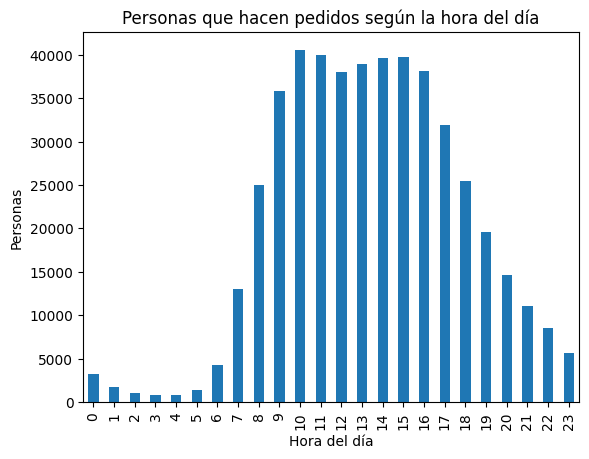

In [38]:
from matplotlib import pyplot as plt
users_per_hours = df_instacart_orders.groupby('order_hour_of_day')['user_id'].count().reset_index()
print(users_per_hours)

users_per_hours.plot(x='order_hour_of_day',
                    y='user_id',
                    kind='bar',
                    title='Personas que hacen pedidos según la hora del día',
                    xlabel='Hora del día',
                    ylabel='Personas',
                    legend=False)
plt.show()

Es evidente que entre las 10 a.m. y las 16 p.m. más personas realizan pedidos. La menor cantidad de personas que hacen pedidos en el día corresponde al horario de la madrugada entre 1 a.m. y 6 a.m.

### [A3] ¿Qué día de la semana compran víveres las personas?

   order_dow  user_id
0          0    84090
1          1    82185
2          2    65833
3          3    60897
4          4    59810
5          5    63488
6          6    62649


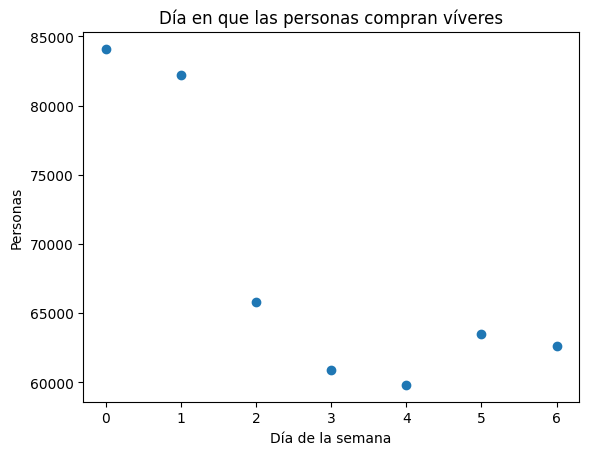

In [39]:
users_per_day = df_instacart_orders.groupby('order_dow')['user_id'].count().reset_index()
print(users_per_day)

users_per_day.plot(x='order_dow',
                  y='user_id',
                  style='o',
                  title='Día en que las personas compran víveres',
                  xlabel='Día de la semana',
                  ylabel='Personas',
                  legend=False)
plt.show()

Se puede observar que el día que más personas realizan sus compras es el Domingo, seguido por el día Lunes. Por otra parte, el día con menor actividad de las personas realizando pedidos es el Jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

    days_since_prior_order  user_id
0                      0.0     9589
1                      1.0    20179
2                      2.0    27138
3                      3.0    30224
4                      4.0    31006
5                      5.0    30096
6                      6.0    33930
7                      7.0    44577
8                      8.0    25361
9                      9.0    16753
10                    10.0    13309
11                    11.0    11467
12                    12.0    10658
13                    13.0    11737
14                    14.0    13992
15                    15.0     9416
16                    16.0     6587
17                    17.0     5498
18                    18.0     4971
19                    19.0     4939
20                    20.0     5302
21                    21.0     6448
22                    22.0     4514
23                    23.0     3337
24                    24.0     3015
25                    25.0     2711
26                    26.0  

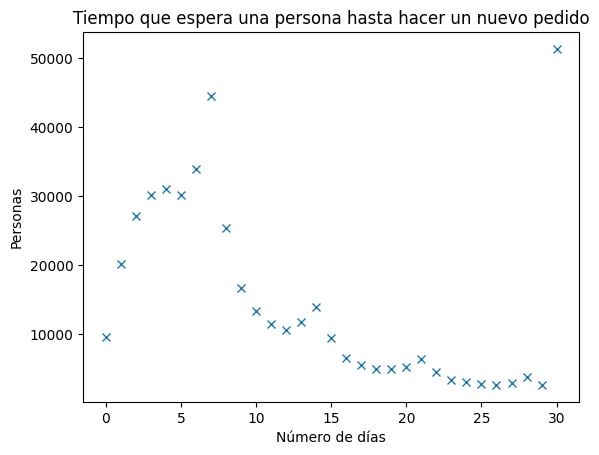

In [40]:
period_time = df_instacart_orders.groupby('days_since_prior_order')['user_id'].count().reset_index()
print(period_time)
print('Mínimo:', period_time[period_time['user_id']==min(period_time['user_id'])], '\n', 'Máximo:', period_time[period_time['user_id']==max(period_time['user_id'])])

period_time.plot(x='days_since_prior_order',
                y='user_id',
                style='x',
                title='Tiempo que espera una persona hasta hacer un nuevo pedido',
                xlabel='Número de días',
                ylabel='Personas',
                legend=False)
plt.show()

Se pudo observar que la mayor cantidad de personas esperan 30 días hasta hacer otro pedido. Y la minoría espera 26 días para hacer otro pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
m_s = df_instacart_orders[(df_instacart_orders['order_dow']==3) | (df_instacart_orders['order_dow']==6)]

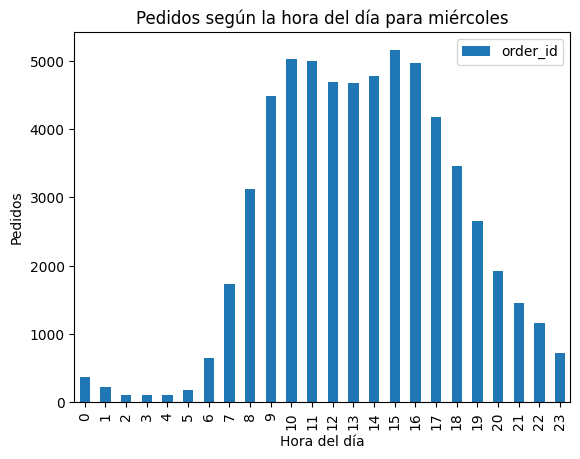

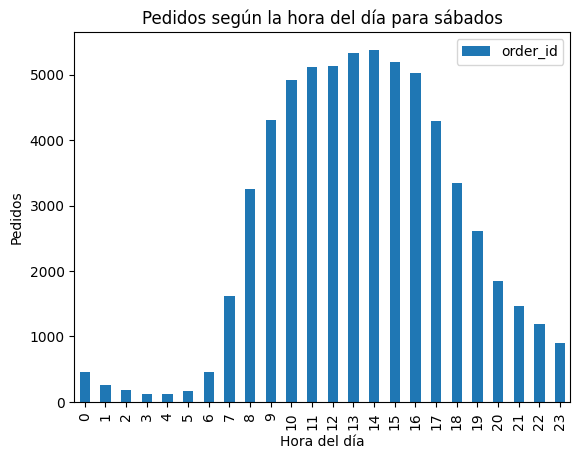

In [42]:
m_s_3 = m_s[m_s['order_dow']==3].groupby('order_hour_of_day')['order_id'].count().reset_index()
m_s_6 = m_s[m_s['order_dow']==6].groupby('order_hour_of_day')['order_id'].count().reset_index()

m_s_3.plot(x='order_hour_of_day',
          y='order_id',
          kind='bar',
          title='Pedidos según la hora del día para miércoles',
          xlabel='Hora del día',
          ylabel='Pedidos')
plt.show()

m_s_6.plot(x='order_hour_of_day',
          y='order_id',
          kind='bar',
          title='Pedidos según la hora del día para sábados',
          xlabel='Hora del día',
          ylabel='Pedidos')
plt.show()

In [43]:
wednesday = df_instacart_orders[df_instacart_orders['order_dow']==3]['order_hour_of_day']
saturday = df_instacart_orders[df_instacart_orders['order_dow']==6]['order_hour_of_day']

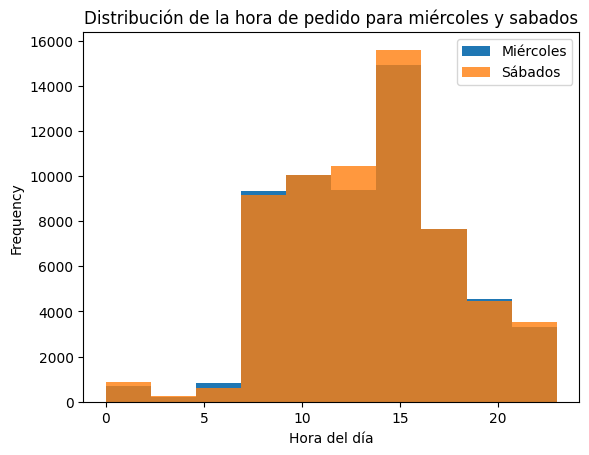

In [44]:
wednesday.plot(kind='hist')
saturday.plot(kind='hist', alpha=0.8)
plt.title('Distribución de la hora de pedido para miércoles y sabados')
plt.xlabel('Hora del día')
plt.legend(['Miércoles', 'Sábados'])

plt.show()

Si bien, las distribuciones para la frecuencia de actividad según la hora para miércoles y sábados es similar, se puede evidenciar que existen pequeñas diferencias para los horarios de 12 a 14 p.m. donde se ven más pedidos los días sábados siendo su pico de actividad, en cambio los miércoles presentan una disminución despues de las 11 a.m. hasta las 14 p.m. para volver a mayor actividad y tener el pico máximo de pedidos a las 15 p.m.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
order_user = df_instacart_orders.groupby('user_id')['order_number'].sum().reset_index()
print(order_user)

        user_id  order_number
0             2             5
1             4             8
2             5             4
3             6             5
4             7            32
...         ...           ...
157432   206203             2
157433   206206           246
157434   206207            40
157435   206208           212
157436   206209            17

[157437 rows x 2 columns]


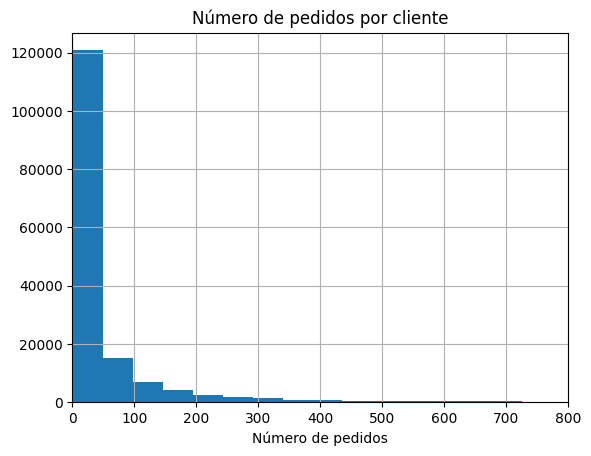

In [46]:
order_user['order_number'].hist(bins=30)
plt.title('Número de pedidos por cliente')
plt.xlabel('Número de pedidos')

plt.xlim([0, 800])

plt.show()

Se puede observar que existe mayor frecuencia en clientes que realizan menos de 100 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
products = df_products[['product_id', 'product_name']]
order_products = df_order_products[['order_id', 'product_id']]
df = order_products.merge(products, on='product_id', how='left')
print(df.head())

   order_id  product_id                                       product_name
0   2141543       11440                     CHICKEN BREAST TENDERS BREADED
1    567889        1560                                         BAG OF ICE
2   2261212       26683  CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...
3    491251        8670                                     DICED TOMATOES
4   2571142        1940                        ORGANIC 2% REDUCED FAT MILK


In [48]:
df2 = df.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)
print(df2)

product_id  product_name                                          
24852       BANANA                                                    66050
13176       BAG OF ORGANIC BANANAS                                    53297
21137       ORGANIC STRAWBERRIES                                      37039
21903       ORGANIC BABY SPINACH                                      33971
47209       ORGANIC HASS AVOCADO                                      29773
                                                                      ...  
5836        ARCTIC D COD LIVER OIL LEMON                                  1
43573       WHISK- 10 INCH                                                1
43570       QUESO COTIJA                                                  1
36174       WHOLE PINTO BEANS                                             1
41403       EXTRA RICH & THICK SPAGHETTI SAUCE SPICES & SEASONINGS        1
Name: order_id, Length: 45573, dtype: int64


In [49]:
print(df2.head(20))

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Se puede obser var que los productos más pedidos corresponden a frutas y verduras a excepción de la leche orgánica.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
items_per_order = df_order_products.groupby('order_id')['product_id'].count().reset_index()
print(items_per_order.head())
print(items_per_order.shape)

user_orders = df_instacart_orders[['order_id', 'user_id']]

   order_id  product_id
0         4          13
1         9          15
2        11           5
3        19           3
4        20           8
(450046, 2)


In [51]:
df_items_orders = user_orders.merge(items_per_order, on='order_id', how='left')
print(df_items_orders.describe())
print(df_items_orders.info())
print(df_items_orders['product_id'].mean())

df_items_orders.fillna(df_items_orders['product_id'].mean().astype('int'), inplace=True)
print(df_items_orders.info())

           order_id        user_id     product_id
count  4.789520e+05  478952.000000  450046.000000
mean   1.709953e+06  102966.654911      10.098983
std    9.869537e+05   59525.292863       7.540206
min    4.000000e+00       2.000000       1.000000
25%    8.564698e+05   51413.750000       5.000000
50%    1.709521e+06  102633.000000       8.000000
75%    2.563002e+06  154419.000000      14.000000
max    3.421079e+06  206209.000000     127.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478951
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    478952 non-null  int64  
 1   user_id     478952 non-null  int64  
 2   product_id  450046 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 14.6 MB
None
10.098983215049127
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478951
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---

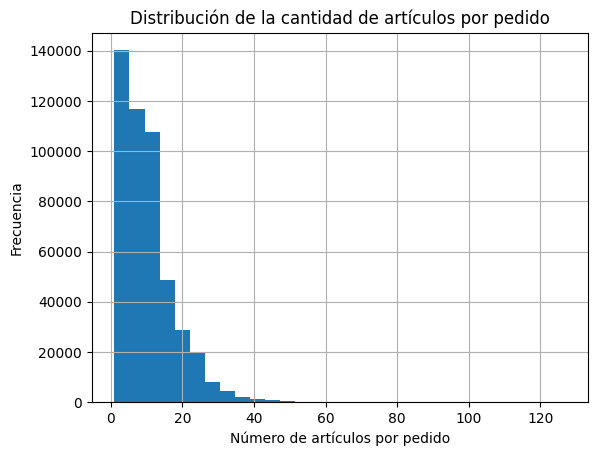

In [52]:
df_items_orders['product_id'].hist(bins=30)
plt.title('Distribución de la cantidad de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')

plt.show()

Al combinar DataFrames es posible quedarse con valores ausentes. En este caso el DataFrame df_instacart_orders tenía más filas correspondientes a `'order_id'` que el DataFrame df_order_products no tenía, es por esto que en el nuevo DataFrame se registraron valores ausentes que fueron remplazados por la media de artículos por pedido. La media de artículos por pedido es de 10 artículos. Se observa que la distribución presenta mayor frecuencia en pedidos con menos de 20 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
reordered_products = df_order_products[df_order_products['reordered']==1][['reordered', 'product_id']]
print(reordered_products.head())

products = df_products[['product_id', 'product_name']]
print(products.head())

   reordered  product_id
1          1        1560
2          1       26683
3          1        8670
4          1        1940
5          1       21616
   product_id                                       product_name
0           1                         CHOCOLATE SANDWICH COOKIES
1           2                                   ALL-SEASONS SALT
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4           5                          GREEN CHILE ANYTIME SAUCE


In [54]:
df_reordered = reordered_products.merge(products, on='product_id', how='left')
print(df_reordered.head())

   reordered  product_id                                       product_name
0          1        1560                                         BAG OF ICE
1          1       26683  CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...
2          1        8670                                     DICED TOMATOES
3          1        1940                        ORGANIC 2% REDUCED FAT MILK
4          1       21616                               ORGANIC BABY ARUGULA


In [55]:
top20_reordered = df_reordered.groupby(['product_id', 'product_name'])['reordered'].count().sort_values(ascending=False)

In [56]:
print(top20_reordered.head(20))

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: reordered, dtype: int64


Se puede observar que los principales productos que vuelven a pedirse con frecuencia corresponden a frutas y verduras en su mayoría orgánicas. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
df_total_orders = df_order_products.groupby('product_id')['order_id'].count().reset_index()
print(df_total_orders.head())

df_reordered_orders = df_order_products[df_order_products['reordered']==1].groupby('product_id')['order_id'].count().reset_index()
print(df_reordered_orders.head())

   product_id  order_id
0           1       280
1           2        11
2           3        42
3           4        49
4           7         2
   product_id  order_id
0           1       158
1           3        31
2           4        25
3           7         1
4           8         6


In [58]:
df_reorder_rate = df_total_orders.merge(df_reordered_orders, on='product_id', how='left', suffixes=['_total', '_reordered'])
print(df_reorder_rate.head())

df_reorder_rate = df_reorder_rate.dropna(subset=['order_id_reordered'])
print(df_reorder_rate.head())

   product_id  order_id_total  order_id_reordered
0           1             280               158.0
1           2              11                 NaN
2           3              42                31.0
3           4              49                25.0
4           7               2                 1.0
   product_id  order_id_total  order_id_reordered
0           1             280               158.0
2           3              42                31.0
3           4              49                25.0
4           7               2                 1.0
5           8              19                 6.0


In [59]:
df_reorder_rate['reorder_rate'] = df_reorder_rate['order_id_reordered']/df_reorder_rate['order_id_total']
df_reorder_rate = df_reorder_rate.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
print(df_reorder_rate.sort_values('reorder_rate', ascending=False))
print(df_reorder_rate.describe())

       product_id  order_id_total  order_id_reordered  reorder_rate  \
8682        12038               1                 1.0      1.000000   
1283         1809               2                 2.0      1.000000   
26334       36122               2                 2.0      1.000000   
2306         3205               3                 3.0      1.000000   
30526       41901               6                 6.0      1.000000   
...           ...             ...                 ...           ...   
34536       47385              48                 1.0      0.020833   
27061       37120             109                 2.0      0.018349   
10643       14688              55                 1.0      0.018182   
20937       28741              55                 1.0      0.018182   
32506       44626              91                 1.0      0.010989   

                                            product_name  
8682            FOR WOMEN MAXIMUM ABSORBENCY L UNDERWEAR  
1283   SLOW KETTLE STYLE SANT

Se puede observar que en promedio la proporción de veces que se vuelve a pedir es del 48.64%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [60]:
df_total = df_instacart_orders[['order_id', 'user_id']].merge(df_order_products[['order_id', 'product_id', 'reordered']], on='order_id', how='left')
df_total_products_per_user = df_total.groupby('user_id')['product_id'].count().reset_index()
print(df_total_products_per_user.head())

df_reorder_products_per_user = df_total[df_total['reordered']==1].groupby('user_id')['product_id'].count().reset_index()
print(df_reorder_products_per_user.head())

df_reorder_rate_user = df_total_products_per_user.merge(df_reorder_products_per_user, on='user_id', how='left', suffixes=['_total', '_reordered'])
print(df_reorder_rate_user.head())

df_reorder_rate_user = df_reorder_rate_user.dropna(subset=['product_id_reordered'])
print(df_reorder_rate_user.head())

   user_id  product_id
0        2          26
1        4           2
2        5          12
3        6           4
4        7          14
   user_id  product_id
0        2           1
1        5           8
2        7          13
3       11           3
4       12           3
   user_id  product_id_total  product_id_reordered
0        2                26                   1.0
1        4                 2                   NaN
2        5                12                   8.0
3        6                 4                   NaN
4        7                14                  13.0
   user_id  product_id_total  product_id_reordered
0        2                26                   1.0
2        5                12                   8.0
4        7                14                  13.0
6       11                15                   3.0
7       12                12                   3.0


In [61]:
df_reorder_rate_user['reorder_rate'] = df_reorder_rate_user['product_id_reordered']/df_reorder_rate_user['product_id_total']
print(df_reorder_rate_user.head())
print(df_reorder_rate_user.describe())

   user_id  product_id_total  product_id_reordered  reorder_rate
0        2                26                   1.0      0.038462
2        5                12                   8.0      0.666667
4        7                14                  13.0      0.928571
6       11                15                   3.0      0.200000
7       12                12                   3.0      0.250000
             user_id  product_id_total  product_id_reordered   reorder_rate
count  132991.000000     132991.000000         132991.000000  132991.000000
mean   103179.252340         33.144980             20.180599       0.556751
std     59541.029953         37.054519             28.702502       0.248833
min         2.000000          1.000000              1.000000       0.014925
25%     51633.500000         10.000000              4.000000       0.363636
50%    103115.000000         21.000000             10.000000       0.562500
75%    154775.500000         42.000000             24.000000       0.750000
ma

Se pudo evidenciar que la media de la proporción de productos reordenados por usuario es 55.67%

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [62]:
df_prod = df_order_products[['order_id', 'product_id', 'add_to_cart_order']]

In [63]:
df_prod_2 = df_prod[df_prod['add_to_cart_order']==1].groupby('product_id')['order_id'].count().reset_index()
print(df_prod_2.head())

   product_id  order_id
0           1        47
1           2         2
2           3         5
3           4         1
4           8         4


In [64]:
df_prod_3 = df_prod_2.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df_prod_3.rename(columns={'order_id':'count_first_prod'}, inplace=True)

print(df_prod_3.sort_values('count_first_prod', ascending=False).head(20))


       product_id  count_first_prod                 product_name
13414       24852             15562                       BANANA
7127        13176             11026       BAG OF ORGANIC BANANAS
15028       27845              4363           ORGANIC WHOLE MILK
11384       21137              3946         ORGANIC STRAWBERRIES
25439       47209              3390         ORGANIC HASS AVOCADO
11786       21903              3336         ORGANIC BABY SPINACH
25732       47766              3044              ORGANIC AVOCADO
10622       19660              2336                 SPRING WATER
9050        16797              2308                 STRAWBERRIES
15102       27966              2024          ORGANIC RASPBERRIES
24024       44632              1914   SPARKLING WATER GRAPEFRUIT
26519       49235              1797          ORGANIC HALF & HALF
25658       47626              1737                  LARGE LEMON
115           196              1733                         SODA
20853       38689        

Se puede observar que el principal artículo añadido en primer lugar al carrito es la banana.

### Conclusion general del proyecto:

El proyecto permitió conocer el comportamiento de compra de los usuarios y las tendencias en los productos seleccionados. 
- Se pudo identificar el patrón de preferencia en los horarios de compras, observando que a las 9 a.m. se tiene mayor actividad. Del mismo modo, se evidenció que el Domingo y Lunes son los días en que más personas realizan sus compras. Y las personas generalmente esperan 30 días antes de hacer otro pedido.
- Se observó que la banana es el producto más pedido y más repetido en nuevos pedidos, así como también es el primer producto en ser seleccionado para el carrito.
- Se identificó la tasa promedio de repetición en productos pedidos que está por encima del 50%. Con esta información se puede segmentar a los clientes y productos, estableciendo ciertas prioridades en las campañas de promoción para estos productos.
- El preprocesamiento de datos fue primordial para garantizar la calidad de los datos y permitir los análisis posteriores.